# Census Data Analysis

This notebook focuses on the analysis of the census data of a town to prepare, process, analyze, and make informed data-driven decisions for future economic, social and infrastructural planning of the community.<br>
I will be using python programming; functions, pandas, seaborn, matplotlib, several iteration methods, and various other libraries to accurately pre-process data, make analysis, forecast, and recommendations.

### <font color=#000000>Importing Libraries and Data</font>

In [513]:
import random
import pandas as pd
import numpy as np
from word2number import w2n
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(color_codes=True)
from statistics import mode
import sweetviz as sv
import re
import plotly.graph_objs as go
import plotly
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Read in the Census Data

In [511]:
df = pd.read_csv('census.csv')

Using Sweetviz To Analyze Data

In [512]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [206]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,None,None
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,None,None
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,Male,Student,None,NaN
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,None,None


### Inspecting Missing Values and DataTypes

In [515]:
df.isnull().sum()

House Number                        2
Street                              0
First Name                          2
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1677
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1717
dtype: int64

In [516]:
df.dtypes

House Number                     object
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

<b> Notes:</b> Age has a data type 'object' which already shows some or all values has other data types other than integer.

## Data Cleaning

* I will be using the bottom-up approach to clean this data but first I will deal with the Age and Religion column.

In [517]:
# This cell checks the unique values. This shows problematic inputs values.
uHouseNo =    df['House Number'].unique()
uStreet =     df['Street'].unique()
uFirstname =  df['First Name'].unique()
uSurname =    df['Surname'].unique()
uAge=         df['Age'].unique()
uBond =       df['Relationship to Head of House'].unique()
uMStatus =    df['Marital Status'].unique()
uGender =     df['Gender'].unique()
UOccupation = df['Occupation'].unique()
UInfirmity =  df['Infirmity'].unique()
UReligion =   df['Religion'].unique()

### Age

In [518]:
uAge

array(['43', '44', '5', '25', '24', '3', '105', '73', '19', '10', '57',
       '30', '2', '88', '85', '52', '56', '28', '47', '20', '75', '59',
       '42', '61', '67', '66', '76', '77', '50', '26', '27', '55', '53',
       '29', '11', '22', '64', '68', '38', '34', '32', '37', '13', '69',
       '81', '60', '72', '31', '54', '83', '41', '39', '33', '4', '48',
       '62', '70', '46', '16', '84', '65', '15', '21', '40', '14', '12',
       '23', '74', '7', '51', '92', '6', '45', '63', '18', '36', '55.55',
       '17', '9', '71', 'Four', '49', '0', '80', '89', '91', '35', '1.75',
       'One', '58', '8', '1', '82', '79', '98', '100', '78', '94', '104',
       '96', '86', '87', '58.5088688', '0.5', '103', '93', '119', '90',
       '106', '55.52492408', '56.52492408', '131', '107', '55.27579403',
       '57.27579403', '99', '97', '-1', '95', '55.63583519',
       '59.22686093'], dtype=object)

In [519]:
# This cell checks for letters in the column
Age_Letters = df['Age'].str.isalpha()

for linenum, line in enumerate(Age_Letters):
    if  line == True:
        print(linenum)

201
320


In [522]:
df.loc[201,'Age']

df.loc[320,'Age']

'Four'

'One'

The cell below replaces the word numbers to numeric characters.

In [523]:
df['Age'] = df['Age'].replace('Four', 4) 
df['Age'] = df['Age'].replace('One', 1)
df['Age'].replace(['-1'], 0, inplace=True)

In [525]:
df[df['Age']==' '] #Checking for blank space

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [527]:
# comfirming the word number  replacements.
for linenum, line in enumerate(df['Age']):
    if linenum == 320 or linenum == 201:
        print(line)

4
1


The cells below will cast the data type from object to float and float to integer respectively.

In [528]:
df["Age"] = df["Age"].astype(float)

In [529]:
df["Age"] = df["Age"].astype(int)

In [530]:
df['Age'] = df['Age'].round()

In [531]:
df["Age"].dtypes

dtype('int32')

The code cells below checks the outlier in Age. Note: The oldest human in modern era is 122years, 164 days old.<br>
The code cells will wrangle the data to replace the outlier(s) by checking the maximum age and replacing as necessary.

In [533]:
df[df.Age == df.Age.max()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3990,8,Cancerpath Drive,Josephine,Holmes,131,Head,Married,Female,Retired Clinical psychologist,None,Christian


* Looking at the oldest as recorded in our census(131), we will assume that she simply could not recall her age correctly.
* Here, I will replace the age with parhaps, the closest family member.

In [534]:
# Checking if there is a family member whose age we can interpolate to replace the outlier 131.
df[df['Age'] >= 100]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,3,Simmons Meadow,Tina,Palmer,105,Head,Widowed,Female,Retired Risk analyst,None,Christian
870,32,Wharf Wells,Frank,Wright,100,Husband,Married,Male,Retired Counsellor,None,None
1151,35,Chandler Drive,Max,Faulkner,104,Head,Married,Male,Retired Geophysicist/field seismologist,None,Methodist
2391,16,Green Wall,Yvonne,Knight,103,Head,Single,Female,"Retired Surveyor, planning and development",None,Catholic
3323,27,Brightwater Drive,Sally,Perry,119,Head,Married,Female,Retired Company secretary,None,Christian
3324,27,Brightwater Drive,Billy,Perry,119,Husband,Married,Male,Retired Diagnostic radiographer,None,Christian
3933,26,Guild Lane,Jordan,Johnson,106,Husband,Married,Male,Retired Quality manager,None,None
3990,8,Cancerpath Drive,Josephine,Holmes,131,Head,Married,Female,Retired Clinical psychologist,None,Christian
3991,8,Cancerpath Drive,Stewart,Holmes,107,Husband,Married,Male,Retired Rural practice surveyor,None,Christian
4780,16,Leeds Avenue,Scott,Watkins,104,Head,Single,Male,"Retired Scientist, audiological",None,Christian


Above data suggests linenum 3990 and 3991 are married. 131 will be replaced with 107.

In [535]:
df['Age'] = df['Age'].replace(131, 107)

In [536]:
df[df['Age'] > 100] # checking to confirm the replacement

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,3,Simmons Meadow,Tina,Palmer,105,Head,Widowed,Female,Retired Risk analyst,None,Christian
1151,35,Chandler Drive,Max,Faulkner,104,Head,Married,Male,Retired Geophysicist/field seismologist,None,Methodist
2391,16,Green Wall,Yvonne,Knight,103,Head,Single,Female,"Retired Surveyor, planning and development",None,Catholic
3323,27,Brightwater Drive,Sally,Perry,119,Head,Married,Female,Retired Company secretary,None,Christian
3324,27,Brightwater Drive,Billy,Perry,119,Husband,Married,Male,Retired Diagnostic radiographer,None,Christian
3933,26,Guild Lane,Jordan,Johnson,106,Husband,Married,Male,Retired Quality manager,None,None
3990,8,Cancerpath Drive,Josephine,Holmes,107,Head,Married,Female,Retired Clinical psychologist,None,Christian
3991,8,Cancerpath Drive,Stewart,Holmes,107,Husband,Married,Male,Retired Rural practice surveyor,None,Christian
4780,16,Leeds Avenue,Scott,Watkins,104,Head,Single,Male,"Retired Scientist, audiological",None,Christian


In [226]:
# Inspecting the changes
df['Age'].unique()

array([ 43,  44,   5,  25,  24,   3, 105,  73,  19,  10,  57,  30,   2,
        88,  85,  52,  56,  28,  47,  20,  75,  59,  42,  61,  67,  66,
        76,  77,  50,  26,  27,  55,  53,  29,  11,  22,  64,  68,  38,
        34,  32,  37,  13,  69,  81,  60,  72,  31,  54,  83,  41,  39,
        33,   4,  48,  62,  70,  46,  16,  84,  65,  15,  21,  40,  14,
        12,  23,  74,   7,  51,  92,   6,  45,  63,  18,  36,  17,   9,
        71,  49,   0,  80,  89,  91,  35,   1,  58,   8,  82,  79,  98,
       100,  78,  94, 104,  96,  86,  87, 103,  93, 119,  90, 106, 107,
        99,  97,  95])

Here, I described the age field to have an overview of the measures of central tendency

In [537]:
c

count    7581.000000
mean       37.210394
std        22.037673
min         0.000000
25%        19.000000
50%        36.000000
75%        53.000000
max       119.000000
Name: Age, dtype: float64

### Religion

Here, People older than 18 with nan Religion are checked. Children can have nan religion as they are unable to choose at that stage,therefore all nan values are split, and investigated.

* Investigate adults(18 years and above) to check if the omission(s) were intentional.
* I substituted fake religion with Unknown.
* NaN values for age 18 an above is checked and replaced with the mode of the field
* Nan values of children with age below 18 will be replaced with Undeclared as a valid choice at this age.
* Note: Jedi is not a religion.  Source: [Charity Commision for England and Wales Jedi Application](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/578931/Temple_of_the_Jedi_Order_FINAL_DECISION.pdf)

In [538]:
#inpecting unique values in religion.
UReligion

array(['None', nan, 'Christian', 'Catholic', 'Muslim', 'Methodist',
       'Jewish', 'Jedi', 'Sikh', 'Bahai', 'Agnostic', 'Undecided', ' ',
       'Baptist', 'Private'], dtype=object)

In [539]:
df['Religion'].mode()

0    None
dtype: object

Replacing fake religion

In [230]:
df['Religion'].replace(['Jedi', 'Private'], "Unknown", inplace=True)

The cell below replaces all(40) individuals over 17 years of age with NaN religion to None

In [231]:
df.loc[(df['Religion'].isna()) & (df['Age'] > 17),'Religion']='None'

In [232]:
df.loc[(df['Religion'].isna()) & (df['Age'] <= 17),'Religion']='Undeclared'

Those who left the religion column blank:
* Line 2432 in the census data suggests he deliberately left it blank, 
* Line 7000, looking at the spouse(7001), we can carefully assume they chose None.
* The individual in line 7034 seem to live in Christain household but that does not suggest where she stands as she is an adult. So, I went with Undeclared.

In [233]:
df[df['Religion']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2432,31,Green Wall,Allan,Roberts,75,Head,Single,Male,Retired Insurance account manager,None,
7000,28,Crown Stravenue,Molly,Edwards,40,Head,Married,Female,Government social research officer,None,
7034,41,Crown Stravenue,Melissa,Hall,58,None,Single,Female,Production engineer,None,


In [234]:
df.loc[2432,'Religion'] = 'Undeclared'
df.loc[7000,'Religion'] = 'None'
df.loc[7034,'Religion'] = 'Undeclared'

In [235]:
df['Religion'].unique()

array(['None', 'Undeclared', 'Christian', 'Catholic', 'Muslim',
       'Methodist', 'Jewish', 'Unknown', 'Sikh', 'Bahai', 'Agnostic',
       'Undecided', 'Baptist'], dtype=object)

Computing the average (mean, median, mode, IQR) age of the adherents.

In [236]:
df.groupby('Religion')['Age'].mean()

Religion
Agnostic      25.000000
Bahai         50.666667
Baptist       40.000000
Catholic      42.528967
Christian     50.824869
Jewish        45.800000
Methodist     47.043478
Muslim        38.669291
None          42.474850
Sikh          36.632653
Undecided     32.500000
Undeclared     9.216796
Unknown       49.000000
Name: Age, dtype: float64

In [237]:
df.groupby('Religion')['Age'].median()

Religion
Agnostic      25.0
Bahai         49.0
Baptist       40.0
Catholic      40.5
Christian     52.0
Jewish        38.0
Methodist     46.0
Muslim        33.0
None          40.0
Sikh          29.0
Undecided     32.5
Undeclared    10.0
Unknown       49.0
Name: Age, dtype: float64

The cell below shows that 19 is the most frequent age of the mode of religion

In [238]:
# None is the mode is the most frequent religion in our data

df.loc[(df['Age'].mode()),'Religion']

19    None
Name: Religion, dtype: object

Interquartile Range [IQR]

In [239]:
df.loc[(df['Age']),'Religion']

43        Muslim
44          None
5           None
5           None
25          None
         ...    
37          None
17          None
13     Christian
10    Undeclared
4           None
Name: Religion, Length: 7581, dtype: object

In [240]:
# Interquartile range of ages of Religion Source: https://www.statology.org/interquartile-range-python/

q75, q25 = np.percentile(df['Age'], [75 ,25])

iqr = q75 - q25

 
iqr

34.0

In [241]:
# This cell describes religion

df.groupby(['Religion']).describe()

Age                                                       
             count       mean        std   min    25%   50%    75%    max
Religion                                                                 
Agnostic       5.0  25.000000   3.674235  22.0  22.00  25.0  25.00   31.0
Bahai          3.0  50.666667  17.559423  34.0  41.50  49.0  59.00   69.0
Baptist        2.0  40.000000   1.414214  39.0  39.50  40.0  40.50   41.0
Catholic     794.0  42.528967  15.489973  18.0  32.00  40.5  49.75  103.0
Christian   1713.0  50.824869  18.684222  18.0  36.00  52.0  64.00  119.0
Jewish        35.0  45.800000  20.876105  21.0  27.00  38.0  61.50   88.0
Methodist    506.0  47.043478  17.838830  18.0  34.00  46.0  60.00  104.0
Muslim       127.0  38.669291  16.605151  18.0  26.00  33.0  50.00   89.0
None        2664.0  42.474850  17.691332  18.0  28.00  40.0  53.00  106.0
Sikh          49.0  36.632653  17.713806  18.0  24.00  29.0  48.00   88.0
Undecided      2.0  32.500000   3.535534  30.0  31.25  32.5  33.75   35.0
Undeclared  1679.0   9.216796   5.501928   0.0   5.00  10.0  14.00   75.0
Unknown        2.0  49.000000  11.313708  41.0  45.00  49.0  53.00   57.0

### Infirmity

In [242]:
UInfirmity

array(['None', 'Mental Disability', 'Physical Disability', 'Deaf', ' ',
       'Disabled', 'Unknown Infection', 'Blind'], dtype=object)

In [243]:
df[df['Infirmity']==' '] #checking for blank spaces

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
340,2,Stirling View,Edward,Chan,44,Son,Single,Male,Photographer,,Christian
3345,28,Brightwater Drive,Megan,Jones,51,Head,Single,Female,"Designer, textile",,Christian
3419,7,Peacock Neck,Kirsty,Simpson,22,Daughter,Widowed,Female,University Student,,Catholic
4562,6,Friaryrow Street,Debra,Wilkinson,5,Daughter,NaN,Female,Student,,Undeclared
5644,8,Calendar Ranch,Jay,Smith,64,Husband,Married,Male,Architectural technologist,,Christian


The above table shows people who left the infirmity field blank. Investigating their respective household, it is safe to assume they are of good medical condition as they all chose none, so I replaced the blanks spaces with None

In [540]:
df['Infirmity'].replace([' '], "None", inplace=True)

In [541]:
df['Infirmity'].unique()

array(['None', 'Mental Disability', 'Physical Disability', 'Deaf',
       'Disabled', 'Unknown Infection', 'Blind'], dtype=object)

### Occupation

In [246]:
UOccupation

array(['Prison officer', 'Futures trader', 'Student', ...,
       "Retired Barrister's clerk", 'Retired Buyer, industrial',
       'Retired Museum/gallery conservator'], dtype=object)

In [542]:
# No whitespace was found here
whiteSpaceOccupation = df['Occupation'].str.isspace()
for linenum, line in enumerate(whiteSpaceOccupation):
    if  line == True:
        print(linenum)

In [543]:
# Column has no numeric characters
numericOccupation = df['Occupation'].str.isnumeric()
for linenum, line in enumerate(numericOccupation):
    if  line == True:
        print(linenum)

### Gender

In [544]:
uGender

array(['Female', 'Male', 'F', 'M', 'Fe-male', 'MALE', ' ', 'FEMALE'],
      dtype=object)

In [545]:
df['Gender'].replace(['FEMALE', 'F', 'Fe-male'], "Female", inplace=True)
df['Gender'].replace(['MALE', 'M'], "Male", inplace=True)

In [546]:
# This cell checks for lines with blank spaces
for linenum, line in enumerate(df['Gender']):
    if  line == " ":
        print(linenum)

503
2418


The above table shows that index 503 is a woman and 2418 is a boy. They were carefully replaced with respect to their gender.

In [547]:
df.loc[503,'Gender'] = 'Female'
df.loc[2418,'Gender'] = 'Male'

In [548]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Marital Status

* Blank spaces in Marital Status were replaced with the mode of the field.
* NaN values of everyone over 13 was replaced with the mode of the column.
* Children under 13 are not considered to have any status, so NaN values were left as is.
* Note:Appropriate Dating Age. Source: [Age Appropriate for dating](https://www.healthline.com/health/parenting/appropriate-dating-age)

In [553]:
uMStatus

array(['Married', nan, 'Divorced', 'Widowed', 'Single', 'Di-vorced', ' '],
      dtype=object)

In [554]:
df['Marital Status'].mode()

0    Single
dtype: object

In [555]:
df['Marital Status'].replace(['Di-vorced'], "Divorced", inplace=True)

In [556]:
df[(df['Marital Status'].isna()) & (df['Age'] > 17)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3696,50,Smith Manors,Kevin,Jones-Lewis,18,Grandson,NaN,Male,Student,None,NaN


In [557]:
df.loc[(df['Marital Status'].isna()) & (df['Age'] >= 13),'Marital Status']='Single'

In [558]:
df[df['Marital Status'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2397,18,Green Wall,Justin,Rice,13,Grandson,,Male,Student,None,NaN


In [559]:
df.loc[2397,'Marital Status'] = 'Single'

The NaN values left are children under 13 who are not considered/assumed to have any status

In [560]:
df['Marital Status'].isnull().sum()

1143

In [561]:
df.groupby(['Marital Status']).describe()

Age                                                     
                 count       mean        std   min   25%   50%   75%    max
Marital Status                                                             
Divorced         751.0  42.727031  17.399503  18.0  29.0  40.0  53.0   94.0
Married         2182.0  51.587076  17.424323  18.0  39.0  50.0  64.0  119.0
Single          3130.0  33.677955  15.453240  13.0  20.0  31.0  45.0  104.0
Widowed          375.0  65.922667  18.023808  18.0  60.5  71.0  77.0  105.0

### Relationship to head of House
* Here, checked that there are no individuals under 17years old recorded as head, husband, partner, wife, son-in-law

In [263]:
uBond

array(['Head', 'Husband', 'Daughter', 'Son', 'Lodger', 'Granddaughter',
       'Grandson', 'Wife', 'None', 'Partner', 'Neice', 'Sibling',
       'Visitor', 'Adopted Daughter', 'Step-Son', 'Cousin', 'Adopted Son',
       'Step-Daughter', 'Son-in-law', 'Nephew'], dtype=object)

In [562]:
df[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 17)]
df[(df['Relationship to Head of House'] == 'Partner') & (df['Age'] < 17)]
df[(df['Relationship to Head of House'] == 'Husband') & (df['Age'] < 17)]
df[(df['Relationship to Head of House'] == 'Wife') & (df['Age'] < 17)]
df[(df['Relationship to Head of House'] == 'Son-in-law') & (df['Age'] < 17)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Cleaning Surname

In [563]:
uSurname

array(['Bradley', 'Slater', "O'Brien", 'Palmer', 'Sutton', 'Marshall',
       'Jones', 'Hanson', 'Smith', 'Nelson', 'Burns', 'Price', 'Doherty',
       'Hargreaves', 'James', 'Webb', 'Johnson', 'Davies', 'Sharp',
       'Green', 'Barnes', 'Martin', 'Patel', 'Brown', 'Gilbert', 'Lyons',
       'Graham', 'Miles', 'Clarke', 'Field', 'Barker', 'Singh', 'Cameron',
       'Murphy', 'Davis', 'Russell', 'Richardson', 'Potter', 'Edwards',
       'Heath', 'Wong', 'Wood', 'Ferguson', 'Hughes', 'Tucker', 'Todd',
       'Fisher', 'Dawson', 'Owens', 'Grant', 'Jade Alexander', 'Marsh',
       'Adams', 'Blackburn', 'Knight', 'Young', 'Thomas', 'Carter',
       'Freeman', 'Joyce', 'Hudson', 'Hyde', 'Rogers', 'Kirk', 'Pearson',
       'Day', 'Wall', 'Burton', 'Shepherd', 'Dennis', 'Williamson-Hill',
       'Payne-Williamson-Hill', 'Middleton', 'Hodgson', 'Rowe', 'Harris',
       'Booth', 'Butler', 'Scott', 'Morrison', 'Nash', 'West', 'Simpson',
       'Harrison-Simpson', 'Anderson', 'Morgan', 'Jackson',

In [564]:
# Checking for blank spaces

df[df['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5058,114,James Views,Aaron,,34,Husband,Married,Male,Data scientist,None,None


Blank space replaced with the mode of the field and confirmed with the next code cell

In [565]:
df.loc[5058,'Surname'] = 'James'

In [566]:
for linenum, line in enumerate(df['Surname']): #checking if line has been corrected
    if linenum == 5058:
        print(line)

James


### Firstname

* Here, there are two names recorded as N and P respectively. They were replaced with the mode of the first name<br>
* Note: Both are male as captured in the Gender column
* The NaN values are replaced with the mode of their gender with respet to the first name as seen below. 

In [567]:
uFirstname

array(['Andrea', 'Peter', 'Lauren', 'Henry', 'Edward', 'Melanie', 'Lucy',
       'Tina', 'Jeremy', 'Suzanne', 'Pamela', 'Justin', 'Benjamin',
       'Julian', 'Beverley', 'Bethan', 'Marcus', 'Cheryl', 'Bernard',
       'Scott', 'Bruce', 'Danielle', 'Bryan', 'Glenn', 'Melissa',
       'Charlie', 'Graeme', 'Bethany', 'Frank', 'Denise', 'Jason', 'Kate',
       'Simon', 'Jay', 'Daniel', 'Rosie', 'Marc', 'Christine', 'Helen',
       'Lynne', 'Russell', 'Harriet', 'Jeffrey', 'Brian', 'Sylvia',
       'Gareth', 'Ruth', 'Katy', 'Liam', 'Alexandra', 'Laura', 'Mohamed',
       'Irene', 'Abigail', 'Adrian', 'Anna', 'Samantha', 'Dennis',
       'Oliver', 'Robin', 'Sarah', 'Geraldine', 'Dawn', 'Annette',
       'Alison', 'Kirsty', 'Tom', 'Jenna', 'Martin', 'Jennifer', 'Jake',
       'Derek', 'Joshua', 'Kayleigh', 'Terence', 'Jade', nan, 'Vincent',
       'Nathan', 'Vanessa', 'Eric', 'Clive', 'Janet', 'Paula', 'Patricia',
       'Philip', 'Diane', 'Beth', 'Georgia', 'Maria', 'Hazel', 'Natalie',
    

Checking the mode of the first name according to gender</b>

In [568]:
df['First Name'].value_counts()

Colin         36
James         35
Kim           34
Kelly         34
Mary          34
              ..
Billy-Joel     1
N              1
P              1
Billy-Joe      1
Emily Anne     1
Name: First Name, Length: 370, dtype: int64

In [569]:
df['First Name'].replace(['N', 'P'], 'Colin', inplace = True)

In [570]:
df[df['First Name'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
81,36,Morgan Avenue,NaN,Jade Alexander,32,Head,Divorced,Female,Educational psychologist,None,Muslim
1660,23,Belle Center,NaN,James Young,50,Husband,Married,Male,"Education officer, museum",None,None


In [571]:
df.loc[81,'First Name'] = 'Kim'
df.loc[1660,'First Name'] = 'Colin'

In [572]:
df["First Name"].isnull().sum()

0

### Street
* Street has no problematic areas.

In [573]:
uStreet

array(['Simmons Meadow', 'Morgan Avenue', 'Pillar Road', 'Wharf Place',
       'Blue Spring', 'Stirling View', 'Smith Street', 'Griffiths Inlet',
       'Shrine Harbor', 'Rees Locks', 'Dixon Drive', 'Howell Drive',
       'Wharf Wells', 'Queen Avenue', 'Tegid Street', 'Chandler Drive',
       'Adams Ways', 'Guardian Road', 'Runnymede Harbors',
       'Coconutbelt Lane', 'North Road', 'Hall Lane', 'George Pass',
       'Elizabeth Lane', 'Belle Center', 'Bell Orchard', 'Brooks Road',
       'Windsor Avenue', 'Paladin Summit', 'Wright Brook', 'Green Wall',
       'Doherty Extensions', 'Shillingcut Lane', 'February Street',
       'Regent Lane', 'Mason Prairie', 'Scotland Avenue',
       'Butterfly Avenue', 'Mary Drive', 'Mercia Underpass',
       'Halfcrown Terrace', 'Oyster Road', 'Campbell Station',
       'Parry Manor', 'Price Lane', 'Taylor Gateway', 'Brightwater Drive',
       'Peacock Neck', 'Clayton Brooks', 'Portsmouth Park',
       'Smith Manors', 'Spencer Avenue', 'Clementine Po

### House Number

In [574]:
uHouseNo

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

Locating and replacing word numbers

In [579]:
House_Letters = df['House Number'].str.isalpha()

for linenum, line in enumerate(House_Letters):
    if  line == True:
        print(linenum)

6727
7319


In [580]:
df.loc[6727,'House Number']

df.loc[7319,'House Number']

'Two'

'One'

In [581]:
df['House Number'] = df['House Number'].replace('Two', "2") 
df['House Number'] = df['House Number'].replace('One', "1")

* index number 7366, the data suggests he is part of the Murphy family at 13 chester Lane.
* index number 7445, the data suggests she is part of the Bibi family at 36 chester Lane.
* I replaced the NaN values with 13 and 36 respectively

* Tracking the NaN locations and replacing with appropriate house number(s)

In [582]:
df[df['House Number'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7366,NaN,Chester Lane,Dominic,Murphy,10,Son,NaN,Male,Student,None,NaN
7445,NaN,Chester Lane,Charlene,Bibi,61,Head,Married,Female,Planning and development surveyor,None,None


In [583]:
df.loc[7366,'House Number'] = "13"
df.loc[7445,'House Number'] = "36"

In [584]:
df['House Number'].isnull().sum()

0

In [585]:
print(df.shape)
print(df.info())

(7581, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   object
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int32 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 6438 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
dtypes: int32(1), object(10)
memory usage: 622.0+ KB
None


Converting cleaned df to a csv file.

In [284]:
df.to_csv('cleaned_census.csv', index=False)

# Analysis

### Exercise 1.

In [586]:
# Read in cleaned csv file
census = pd.read_csv('cleaned_census.csv')

In [286]:
census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,None,None
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,None,None
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,Female,Student,None,Undeclared
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,Male,Student,None,Undeclared
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,None,None


### Commuters

Here, I represented “commuters” as people who might live in the town that the census has been taken in, <br>
but works in one of the nearby cities. 
* The choice of university students and university staff as commuters was an obvious one as the town does not have a <br>university. 
* I threw in a fraction of other occupations that are likely to work across cities because of the nature of their jobs and some have high paying jobs eg. IT Consultant.

Source: [Travel to work area analysis](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/articles/traveltoworkareaanalysisingreatbritain/2016)

#### Classifying different sections of the  the census using occupation.

In [587]:
commuters = census[(census['Occupation'] == "University Student") 
                       | (census['Occupation'] == "PhD Student")  
                       | (census['Occupation'] == "Higher education lecturer") 
                       | (census['Occupation'] == "Associate Professor") 
                       | (census['Occupation'] == "Professor Emeritus") 
                       | (census['Occupation'] == "Higher education careers adviser") 
                       | (census['Occupation'] == "Lecturer, higher education") 
                       | (census['Occupation'] == "Further education lecturer") 
                       | (census['Occupation'] == "Lecturer, further education")
                       | (census['Occupation'] == "Marketing Executives")
                       | (census['Occupation'] == "Chief Marketing Officer")
                       | (census['Occupation'] == "Environmental consultant")
                       | (census['Occupation'] == "Agricultural consultant")
                       | (census['Occupation'] == "IT consultant")
                       | (census['Occupation'] == "Management consultant")
                       | (census['Occupation'] == "Horticultural consultant")
                       | (census['Occupation'] == "Product Designer")
                       | (census['Occupation'] == "Designer, industrial/product")
                       | (census['Occupation'] == "Industrial/product designer")]


print(f"These individuals travel significant distances for work and school: {len(commuters)}")

These individuals travel significant distances for work and school: 600


In [588]:
commuters.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,None,None
9,4,Simmons Meadow,Suzanne,Sutton,19,Granddaughter,Single,Female,University Student,None,Christian
26,1,Morgan Avenue,Graeme,Webb,20,Head,Single,Male,University Student,None,Catholic
34,7,Morgan Avenue,Daniel,Patel,67,Head,Married,Male,"Lecturer, higher education",None,Muslim
46,13,Morgan Avenue,Ruth,Field,22,Head,Single,Female,University Student,None,None


In [589]:
commuters.groupby(['Occupation']).describe()

House Number                             \
                                        count       mean        std  min   
Occupation                                                                 
Agricultural consultant                   7.0  19.714286  15.184579  6.0   
Associate Professor                       4.0  11.250000  14.930394  1.0   
Chief Marketing Officer                   7.0  24.857143  24.113817  1.0   
Designer, industrial/product              7.0  20.285714  22.997930  1.0   
Environmental consultant                  3.0  32.333333  34.312291  1.0   
Further education lecturer                5.0  30.400000  29.720363  1.0   
Higher education careers adviser          4.0  35.250000  22.381168  4.0   
Higher education lecturer                 5.0  18.800000  14.669697  4.0   
Horticultural consultant                  8.0  21.500000  16.877711  3.0   
IT consultant                             6.0  19.000000  17.888544  7.0   
Industrial/product designer               7.0  31.000000  22.766935  4.0   
Lecturer, further education               6.0  28.333333  19.314934  9.0   
Lecturer, higher education               10.0  22.600000  35.991357  1.0   
Management consultant                     9.0  29.000000  20.964255  5.0   
PhD Student                              19.0  15.526316  21.993354  1.0   
Professor Emeritus                        7.0  26.000000  12.288206  5.0   
University Student                      486.0  25.652263  23.406415  1.0   

                                                               Age             \
                                    25%   50%    75%    max  count       mean   
Occupation                                                                      
Agricultural consultant           11.00  11.0  24.50   50.0    7.0  42.571429   
Associate Professor                1.75   5.5  15.00   33.0    4.0  51.000000   
Chief Marketing Officer            2.00  20.0  49.00   51.0    7.0  39.857143   
Designer, industrial/product       3.50   5.0  36.00   57.0    7.0  33.714286   
Environmental consultant          14.00  27.0  48.00   69.0    3.0  38.000000   
Further education lecturer         6.00  24.0  50.00   71.0    5.0  32.600000   
Higher education careers adviser  29.50  40.0  45.75   57.0    4.0  42.750000   
Higher education lecturer          9.00  15.0  25.00   41.0    5.0  43.800000   
Horticultural consultant           9.75  15.0  35.00   46.0    8.0  47.250000   
IT consultant                      8.25  12.5  19.00   54.0    6.0  41.333333   
Industrial/product designer       13.50  27.0  49.00   61.0    7.0  43.857143   
Lecturer, further education       18.25  23.0  31.50   64.0    6.0  38.666667   
Lecturer, higher education         3.50   7.0  24.50  116.0   10.0  50.500000   
Management consultant             11.00  25.0  43.00   60.0    9.0  40.111111   
PhD Student                        5.00   6.0  15.50   93.0   19.0  28.105263   
Professor Emeritus                21.00  25.0  33.50   43.0    7.0  43.714286   
University Student                 8.25  20.0  35.00  130.0  486.0  20.312757   

                                                                             
                                        std   min    25%   50%    75%   max  
Occupation                                                                   
Agricultural consultant           13.427052  27.0  34.00  37.0  52.00  62.0  
Associate Professor                8.755950  43.0  43.75  50.5  57.75  60.0  
Chief Marketing Officer           14.610824  23.0  31.50  37.0  45.00  66.0  
Designer, industrial/product      15.085471  23.0  25.00  26.0  36.00  65.0  
Environmental consultant           8.185353  29.0  34.50  40.0  42.50  45.0  
Further education lecturer         9.555103  23.0  25.00  30.0  40.00  45.0  
Higher education careers adviser  12.737739  34.0  34.00  38.0  46.75  61.0  
Higher education lecturer         14.686729  27.0  37.00  40.0  49.00  66.0  
Horticultural consultant         

In [590]:
commuters_percentage = (len(commuters))/(len(census)) * 100
print(f"The percentage of commuters our census data is: {round(commuters_percentage, 2)}%")

The percentage of commuters our census data is: 7.91%


<AxesSubplot:xlabel='Age', ylabel='Occupation'>

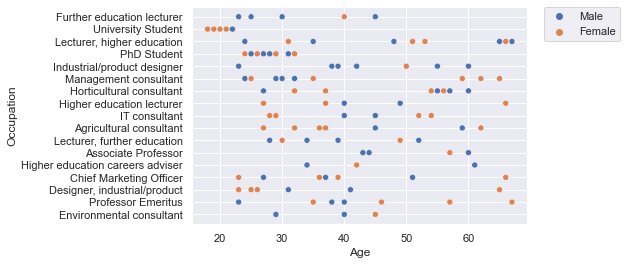

In [591]:
sns.scatterplot(x="Age", y= 'Occupation', hue = 'Gender', data=commuters)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

####  Old Age Care

In [592]:
census.loc[(census['Age'] >=68),'Occupation']='Retired'

In [593]:
census[(census['Age'] >= 68)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,3,Simmons Meadow,Tina,Palmer,105,Head,Widowed,Female,Retired,None,Christian
8,4,Simmons Meadow,Jeremy,Sutton,73,Head,Widowed,Male,Retired,None,Christian
16,7,Simmons Meadow,Marcus,Hanson,88,Head,Married,Male,Retired,None,Christian
17,7,Simmons Meadow,Cheryl,Hanson,85,Wife,Married,Female,Retired,None,None
18,8,Simmons Meadow,Bernard,Smith,73,Head,Widowed,Male,Retired,None,None
...,...,...,...,...,...,...,...,...,...,...,...
7416,29,Chester Lane,Clifford,Shaw,77,Husband,Married,Male,Retired,None,None
7453,38,Chester Lane,Kayleigh,Howard,69,Head,Widowed,Female,Retired,None,Catholic
7461,40,Chester Lane,Paul,Kemp,71,Head,Divorced,Male,Retired,None,Christian
7506,1,Nash Inn,Hayley,Ford,82,Head,Married,Female,Retired,None,Methodist


In [594]:
old_age = len(census[(df['Age'] >= 68)])/(len(census)) * 100

print(f"The percentage of seniors in the population: {round(old_age, 2)}%")

The percentage of seniors in the population: 10.55%


We have a large number of 30-54 in our data and this can impact the town's economic growth negatively in the future

In [595]:
middle_age = census[(census['Age'].between(30,64))  ]
middle_age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,None,None
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,None,None
13,5,Simmons Meadow,Julian,Marshall,57,Head,Divorced,Male,Barrister's clerk,None,Christian
14,6,Simmons Meadow,Beverley,Jones,30,Head,Divorced,Female,"Nurse, adult",None,None
19,9,Simmons Meadow,Scott,Nelson,52,Head,Single,Male,"Pharmacist, community",None,None
...,...,...,...,...,...,...,...,...,...,...,...
7568,1,Love Fortress,James,O'Sullivan,45,Husband,Married,Male,Unemployed,None,None
7570,1,Love Fortress,Aaron,Cook,54,Lodger,Single,Male,Dance movement psychotherapist,None,Christian
7571,1,Memorial Farmhouse,Samantha,Page,40,Head,Married,Female,Colour technologist,Blind,None
7572,1,Memorial Farmhouse,Paul,Page,43,Husband,Married,Male,Lexicographer,None,None


In [596]:
middle_age.groupby(['Age']).describe()

House Number                                                      
           count       mean        std  min    25%   50%    75%    max
Age                                                                   
30         110.0  24.900000  25.038667  1.0   7.25  17.5  31.00  135.0
31         116.0  22.724138  19.837420  1.0   7.00  17.0  33.25   99.0
32         104.0  25.586538  22.203214  1.0   8.75  20.5  36.25  113.0
33         115.0  27.530435  24.868539  1.0   8.00  20.0  40.00  134.0
34         127.0  26.763780  25.302129  1.0   9.50  20.0  38.00  116.0
35         102.0  27.029412  25.516625  1.0   9.00  20.5  35.75  145.0
36         137.0  27.846715  26.880698  1.0   8.00  20.0  40.00  129.0
37         104.0  26.567308  24.262226  1.0   8.00  20.5  38.00  123.0
38         113.0  27.548673  23.992183  1.0  10.00  21.0  40.00  114.0
39         115.0  24.643478  21.841611  1.0   8.50  18.0  37.50  117.0
40         135.0  30.748148  28.619406  1.0   9.00  23.0  44.00  131.0
41         114.0  26.710526  27.798492  1.0   6.25  18.0  37.75  131.0
42         132.0  22.303030  21.802703  1.0   7.00  15.0  33.00  132.0
43         128.0  27.976562  29.392394  1.0   8.00  18.5  36.25  147.0
44         121.0  26.619835  26.252383  1.0   7.00  19.0  36.00  138.0
45         112.0  28.294643  27.738365  1.0   7.00  17.0  37.50  111.0
46         112.0  27.919643  24.163161  1.0   9.00  25.0  40.25  139.0
47         108.0  27.685185  26.766435  1.0   7.00  21.0  38.00  125.0
48         115.0  23.695652  27.312414  1.0   6.00  15.0  32.50  139.0
49         109.0  24.908257  26.078067  1.0   8.00  17.0  33.00  124.0
50          89.0  25.494382  23.485549  1.0   9.00  19.0  35.00  124.0
51          97.0  27.618557  25.236978  2.0   9.00  19.0  39.00  144.0
52          98.0  27.846939  27.168945  1.0   7.00  21.5  37.00  128.0
53         103.0  28.611650  22.987308  1.0  10.50  22.0  41.50  115.0
54         100.0  27.090000  24.267489  1.0   8.00  19.0  41.00  128.0
55          79.0  24.518987  22.908324  1.0   8.00  19.0  37.00  120.0
56          88.0  26.136364  21.697599  1.0   8.75  22.5  35.25  123.0
57          80.0  24.525000  24.021602  1.0   6.75  15.0  36.25  121.0
58         100.0  24.990000  20.624343  2.0  10.00  22.0  34.25   93.0
59          70.0  30.085714  26.165993  1.0  12.00  23.5  38.75  124.0
60          76.0  23.092105  19.223720  1.0  10.00  18.5  32.25  116.0
61          73.0  27.890411  24.056970  1.0  12.00  23.0  36.00  118.0
62          84.0  30.857143  29.700165  1.0   8.00  23.5  43.50  143.0
63          61.0  29.377049  31.243220  1.0   8.00  18.0  38.00  124.0
64          55.0  26.381818  22.406589  1.0   9.00  19.0  43.00  103.0

In [597]:
middle_age = len(middle_age)
middle_age = middle_age/(len(census)) * 100

print(f"Middle Aged Population Population: {round(middle_age, 2)}%")

Middle Aged Population Population: 47.25%


### Working Age Population

Source: [The working age population](https://fred.stlouisfed.org/series/LFWA64TTGBQ647S)<br>
I will be choosing 15 - 67 as our data leans towards that number.

In [598]:
working_age_pop=census[(census['Age']>=15) & (census['Age']<=67)]
working_age_pop

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,None,None
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,None,None
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,None,None
5,2,Simmons Meadow,Melanie,O'Brien,24,Head,Divorced,Female,"Production assistant, television",None,None
9,4,Simmons Meadow,Suzanne,Sutton,19,Granddaughter,Single,Female,University Student,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7573,1,Memorial Farmhouse,Lewis,Page,16,Son,Single,Male,Student,None,Undeclared
7574,1,Memorial Farmhouse,Teresa,Page,16,Daughter,Single,Female,Student,None,Undeclared
7575,1,Memorial Farmhouse,Lynne,Page,15,Daughter,Single,Female,Student,None,Undeclared
7576,1,Newry Spire,Howard,Taylor,37,Head,Single,Male,Unemployed,None,None


#### Unemployment Trend

* The headline unemployment rate is calculated by dividing the unemployment level for those aged 16 and over by the total number of economically active people aged 16 and over. Economically active is defined as those in employment plus those who are unemployed. (ONS, 2020)

In [599]:
census.loc[
                (census['Occupation'] != "University Student") 
              & (census['Occupation'] != "PhD Student")  
              & (census['Occupation'] != "Child") 
              & (census['Occupation'] != "Unemployed") 
              & (census['Occupation'] != "Student") 
              & (census['Occupation'] != "Retired"), 'Occupation'] = "Employed"


In [600]:
Unemployed = census[census['Occupation'] == 'Unemployed']




print(f"Number of Unemployed aged is: {len(Unemployed)}")

Number of Unemployed aged is: 503


I created boolean employed and Unemployed columns so it can clearly highlight both rates in my data visuals

In [601]:
census['Un_Employed'] = census.Occupation == "Unemployed"

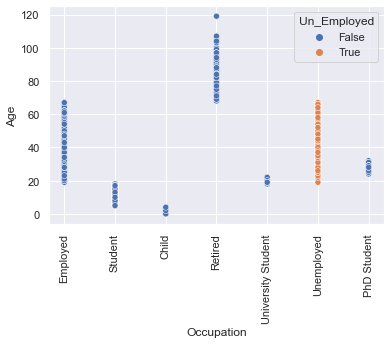

In [602]:
UNE = sns.scatterplot(x="Occupation", y="Age", hue= 'Un_Employed', data=census);

UNE.tick_params(axis='x', rotation=90)

In [607]:
Employed = census[census['Occupation'] == 'Employed']
Employed.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Un_Employed,A_Employed
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Employed,None,None,False,True
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Employed,None,None,False,True
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Employed,None,None,False,True
5,2,Simmons Meadow,Melanie,O'Brien,24,Head,Divorced,Female,Employed,None,None,False,True
13,5,Simmons Meadow,Julian,Marshall,57,Head,Divorced,Male,Employed,None,Christian,False,True


In [608]:
census['A_Employed'] = census.Occupation == "Employed"

In [609]:
census

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Un_Employed,A_Employed
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Employed,None,None,False,True
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Employed,None,None,False,True
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,Female,Student,None,Undeclared,False,False
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,Male,Student,None,Undeclared,False,False
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Employed,None,None,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,1,Newry Spire,Howard,Taylor,37,Head,Single,Male,Unemployed,None,None,True,False
7577,1,Newry Spire,Jason,Taylor,17,Son,Single,Male,Student,None,Undeclared,False,False
7578,1,Newry Spire,Oliver,Taylor,13,Son,Single,Male,Student,None,Undeclared,False,False
7579,1,Newry Spire,Carly,Taylor,10,Daughter,NaN,Female,Student,None,Undeclared,False,False


Employed Chart

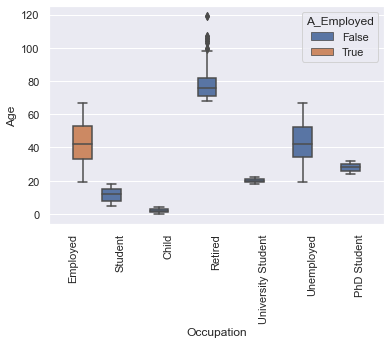

In [610]:
e = sns.boxplot(x="Occupation", y="Age", hue= 'A_Employed', data=census);

e.tick_params(axis='x', rotation=90)

In [611]:
Employed[(Employed['Age'].between(16,67))  ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Un_Employed,A_Employed
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Employed,None,None,False,True
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Employed,None,None,False,True
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Employed,None,None,False,True
5,2,Simmons Meadow,Melanie,O'Brien,24,Head,Divorced,Female,Employed,None,None,False,True
13,5,Simmons Meadow,Julian,Marshall,57,Head,Divorced,Male,Employed,None,Christian,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,1,Adams Ranch,Samuel,Cook,43,Husband,Married,Male,Employed,None,Methodist,False,True
7567,1,Love Fortress,Dawn,O'Sullivan,42,Head,Married,Female,Employed,None,None,False,True
7570,1,Love Fortress,Aaron,Cook,54,Lodger,Single,Male,Employed,None,Christian,False,True
7571,1,Memorial Farmhouse,Samantha,Page,40,Head,Married,Female,Employed,Blind,None,False,True


In [612]:
Unemployment = {"Employed": 3997, "Unemployed": 503 }

Unemployment

{'Employed': 3997, 'Unemployed': 503}

In [613]:
data = pd.DataFrame(Unemployment.items(), columns=["Employed", "Unemployed"] )
data

,Employed,Unemployed
0,Employed,3997
1,Unemployed,503


In [614]:
EA = len(Employed) + len(Unemployed)

print("Economially active people:")

EA

Economially active people:


4500

In [615]:
Unemployment_rate = (len(Unemployed)/EA) * 100

print(f"Unemployment rate: {round(Unemployment_rate, 2)}%")

Unemployment rate: 11.18%


### Emergency Medical Building

In [616]:
infirmity = census[(census['Infirmity'] == 'Mental Disability') | (census['Infirmity'] == 'Physical Disability')]

In [617]:
infirmity_percentage = (len(infirmity))/(len(census)) * 100
print(f"The percentage of the population with infirmity in our census data is less than 1% : {infirmity_percentage}%")

The percentage of the population with infirmity in our census data is less than 1% : 0.2374356944994064%


In [618]:
census.groupby(['Infirmity']).describe()

House Number                                           \
                           count       mean        std   min    25%   50%   
Infirmity                                                                   
Blind                        5.0  19.800000  21.335417   1.0  10.00  12.0   
Deaf                         6.0  19.333333   7.659417  10.0  13.75  18.5   
Disabled                     2.0  14.000000  15.556349   3.0   8.50  14.0   
Mental Disability            5.0  21.400000  19.781304   3.0   5.00  21.0   
None                      7545.0  26.822001  25.269339   1.0   8.00  20.0   
Physical Disability         13.0  32.153846  31.955297   2.0  14.00  25.0   
Unknown Infection            5.0  17.400000  12.992305   6.0   8.00  10.0   

                                     Age                                     \
                      75%    max   count       mean        std   min    25%   
Infirmity                                                                     
Blind                20.0   56.0     5.0  59.400000  18.609138  40.0  43.00   
Deaf                 25.5   29.0     6.0  40.000000  30.033315   4.0  17.75   
Disabled             19.5   25.0     2.0  17.500000  14.849242   7.0  12.25   
Mental Disability    26.0   52.0     5.0  49.200000  34.346761  18.0  22.00   
None                 37.0  150.0  7545.0  37.200795  22.016873   0.0  19.00   
Physical Disability  37.0  124.0    13.0  35.230769  24.056024   1.0  20.00   
Unknown Infection    30.0   33.0     5.0  27.200000  22.698018   7.0  11.00   

                                         
                      50%    75%    max  
Infirmity                                
Blind                59.0  71.00   84.0  
Deaf                 37.0  63.75   78.0  
Disabled             17.5  22.75   28.0  
Mental Disability    37.0  71.00   98.0  
None                 36.0  53.00  119.0  
Physical Disability  34.0  45.00   98.0  
Unknown Infection    15.0  46.00   57.0

### Religious Affliation
Age vs Religion to determine children who are practicing the same religion as the parents and how it affects the growth of religion
* From our cleaned data children 17 and under have undeclared religion but here:
* I investigated adults who lives in the same household with their parents or family ties,
* How it impacts their religious affliation,
* Which religion has the tendency to still hold strong because of affliation.

In [619]:
age_group = ["Son", "Daughter", "Grandson", "Adopted Daughter", "Step-Daughter", "Step-Son", "Adopted Son", "Niece", "Nephew"]

In [620]:
family_religion = census[(census['Age'] > 17) & (census['Relationship to Head of House'].isin(age_group)) & (census['Religion'] == census['Religion']) & (census['House Number'] == census['House Number']) & (census['Street'] == census['Street'])]
family_religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Un_Employed,A_Employed
39,9,Morgan Avenue,Lynne,Gilbert,26,Daughter,Single,Female,Employed,None,Christian,False,True
51,16,Morgan Avenue,Laura,Clarke,38,Daughter,Single,Female,Employed,None,Christian,False,True
64,25,Morgan Avenue,Daniel,Heath,31,Son,Single,Male,Employed,None,Christian,False,True
80,35,Morgan Avenue,Jade,Grant,43,Daughter,Single,Female,Employed,None,Catholic,False,True
111,55,Morgan Avenue,Carly,Payne-Williamson-Hill,29,Daughter,Divorced,Female,Employed,None,Catholic,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7521,1,Nash Inn,Geraldine,Ford,20,Daughter,Single,Female,University Student,None,Methodist,False,False
7529,1,Vulture Mansion,Glen,Quinn,37,Son,Single,Male,Employed,None,None,False,True
7530,1,Vulture Mansion,Keith,Quinn,37,Son,Single,Male,Employed,None,None,False,True
7531,1,Vulture Mansion,Wayne,Quinn,34,Son,Widowed,Male,Employed,None,None,False,True


In [621]:
HHreligious_impact = (len(family_religion))/(len(census)) * 100  # House Hold religious impact


print(f" This percentage of the population are influenced by their family's religious beliefs: {round(HHreligious_impact,1)}%")

 This percentage of the population are influenced by their family's religious beliefs: 11.5%


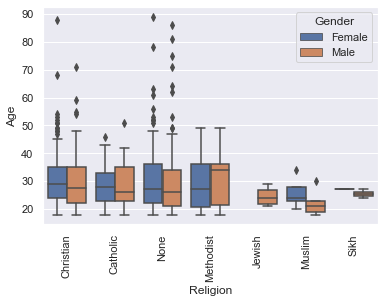

In [622]:
s = sns.boxplot(data=family_religion, x= 'Religion', y= "Age", hue='Gender', whis=1)

s.tick_params(axis='x', rotation=90)

### Birth Rate, Death rate and Difference

Birth rates ranging from 10 to 20 births per 1,000 are considered low, while rates from 40 to 50 births per 1,000 are considered high.

Source: [Birth rate](https://web.archive.org/web/20160526190803/http://www.childtrends.org/?indicators=fertility-and-birth-rates)

In [623]:
baby = census[census['Age'] == 0] #Total number of live births
baby = len(baby)



child_Bearing = census[(census['Age']>=25) & (census['Age']<=29) & (census['Gender'] == 'Female')]
child_Bearing  = len(child_Bearing)


birth25_29 = (baby/child_Bearing)* 1000 






print(f"live births in census data: {baby}")
print(f"Women between 25-29 years with new borns : {child_Bearing}")
print(f"Birth rate of women between 25-29 yeears old : {birth25_29}")

live births in census data: 70
Women between 25-29 years with new borns : 277
Birth rate of women between 25-29 yeears old : 252.7075812274368


Women between the ages of 30 - 34 with 4-year-olds

In [624]:
infant = census[census['Age'] == 4] 
infant = len(infant)


Evolving_age = census[(census['Age']>=30) & (census['Age']<=34) & (census['Gender'] == 'Female')]
Evolving_age = len(Evolving_age)


Evolving_birth_rate = (infant/Evolving_age)* 1000
Evolving_birth_rate = round(Evolving_birth_rate)



babies = baby + infant
TotalBirthRate = Evolving_birth_rate + birth25_29

Birth_rate = ((babies/TotalBirthRate) * 1000)/5


print(f"4 year olds in census data: {infant}")
print(f"Women between 30-34 years with 4year olds : {Evolving_age}")
print(f"Birth rate of women between 30-34 yeears old : {Evolving_birth_rate}")
print(f"Birthrate over a 5 year period is: {TotalBirthRate} children")
print(f"Birth rate is per annum: {round(Birth_rate, 1)} children")

4 year olds in census data: 86
Women between 30-34 years with 4year olds : 325
Birth rate of women between 30-34 yeears old : 265
Birthrate over a 5 year period is: 517.7075812274368 children
Birth rate is per annum: 60.3 children


#### Death Rate

* Death rate 56-60 : 61-65

In [625]:
deaths56_60 = census[(census['Age']>=56) & (census['Age']<=60)]

deaths61_65=census[(census['Age']>=61) & (census['Age']<=65)]

differential = len(deaths56_60) - len(deaths61_65)

diff_annum = round(differential/5)


# Death rate per 1000 of population

Agedpop = len(deaths56_60) + len(deaths61_65)
death_rate56_65 = (diff_annum/Agedpop) * 1000
death_rate56_65 = round((death_rate56_65),1)



print(f" Number of people between ages 56-60: {len(deaths56_60)}")
print(f" Number of people between ages 61-65: {len(deaths61_65)}")
print(f" Deaths rate over a 5 year period: {differential}")
print(f" The Death rate per annum: {diff_annum}")
print(f" Death rate per 1000 of population: {death_rate56_65}")

 Number of people between ages 56-60: 414
 Number of people between ages 61-65: 334
 Deaths rate over a 5 year period: 80
 The Death rate per annum: 16
 Death rate per 1000 of population: 21.4


#### Death rate 66-70 : 71-75

In [626]:
deaths66_70=census[(census['Age']>=66) & (census['Age']<=70)]

deaths71_75=census[(census['Age']>=71) & (census['Age']<=75)]

differential_1 = len(deaths66_70) - len(deaths71_75)


diff_annum_1 = differential_1/5


Agedpop_1 = len(deaths66_70) + len(deaths71_75)
death_rate66_75 = (diff_annum_1/Agedpop_1) * 1000
death_rate66_75 = round((death_rate66_75),1)


print(f" Number of people between ages 66-70: {len(deaths66_70)}")
print(f" Number of people between ages 71-75: {len(deaths71_75)}")
print(f" Deaths over a 5 year period is: {differential_1}")
print(f" The Death rate per annum is: {diff_annum_1}")
print(f" Death rate per 1000 of population is:{death_rate66_75}")

 Number of people between ages 66-70: 260
 Number of people between ages 71-75: 239
 Deaths over a 5 year period is: 21
 The Death rate per annum is: 4.2
 Death rate per 1000 of population is:8.4


#### Death rate for much older People

#### age 76-80:81-55

In [627]:
deaths76_80=census[(census['Age']>=76) & (census['Age']<=80)]

deaths81_85=census[(census['Age']>=81) & (census['Age']<=85)]

differential_2 = len(deaths76_80) - len(deaths81_85)


# Number of deaths per annum
diff_annum_2 = differential_2/5


Agedpop_2 = len(deaths76_80) + len(deaths81_85)
death_rate76_85 = (diff_annum_2/Agedpop_2) * 1000
death_rate76_85 = round((death_rate76_85),1)


print(f" Number of people between ages 76-80: {len(deaths76_80)}")
print(f" Number of people between ages 81-85: {len(deaths81_85)}")
print(f" Deaths over a 5 year period is: {differential_2}")
print(f" The Death rate per annum is: {diff_annum_2}")
print(f" Death rate per 1000 of population is:{death_rate76_85}")

 Number of people between ages 76-80: 163
 Number of people between ages 81-85: 139
 Deaths over a 5 year period is: 24
 The Death rate per annum is: 4.8
 Death rate per 1000 of population is:15.9


#### Age 86-90:91-95

In [628]:
deaths86_90=census[(census['Age']>=86) & (census['Age']<=90)]

deaths91_95=census[(census['Age']>=91) & (census['Age']<=95)]

differential_3 = len(deaths86_90) - len(deaths91_95)


# Number of deaths per annum
diff_annum_3 = differential_3/5


Agedpop_3 = len(deaths86_90) + len(deaths91_95)
death_rate86_95 = (diff_annum_3/Agedpop_3) * 1000
death_rate86_95 = round((death_rate86_95),1)


print(f" Number of people between ages 86-90: {len(deaths86_90)}")
print(f" Number of people between ages 91-95: {len(deaths91_95)}")
print(f" Deaths over a 5 year period is: {differential_3}")
print(f" The Death rate per annum is: {diff_annum_3}")
print(f" Death rate per 1000 of population is:{death_rate86_95}")

 Number of people between ages 86-90: 66
 Number of people between ages 91-95: 18
 Deaths over a 5 year period is: 48
 The Death rate per annum is: 9.6
 Death rate per 1000 of population is:114.3


#### age 96-100:101-105

In [629]:
deaths96_100=census[(census['Age']>=96) & (census['Age']<=100)]

deaths101_105=census[(census['Age']>=101) & (census['Age']<=105)]

differential_4 = len(deaths96_100) - len(deaths101_105)


# Number of deaths per annum
diff_annum_4 = differential_4/5


Agedpop_4 = len(deaths96_100) + len(deaths101_105)
death_rate96_105 = (diff_annum_4/Agedpop_4) * 1000
death_rate96_105 = round((death_rate96_105),1)


print(f" Number of people between ages 96-100: {len(deaths96_100)}")
print(f" Number of people between ages 101-105: {len(deaths101_105)}")
print(f" Deaths over a 5 year period is: {differential_4}")
print(f" The Death rate per annum is: {diff_annum_4}")
print(f" Death rate per 1000 of population is:{death_rate96_105}")

 Number of people between ages 96-100: 8
 Number of people between ages 101-105: 4
 Deaths over a 5 year period is: 4
 The Death rate per annum is: 0.8
 Death rate per 1000 of population is:66.7


#### age 106-110:111-115

In [630]:
deaths106_110=census[(census['Age']>=106) & (census['Age']<=110)]

deaths111_115=census[(census['Age']>=111) & (census['Age']<=115)]

differential_5 = len(deaths106_110) - len(deaths111_115)


# Number of deaths per annum
diff_annum_5 = differential_5/5


Agedpop_5 = len(deaths106_110) + len(deaths111_115)
death_rate106_115 = (diff_annum_5/Agedpop_5) * 1000
death_rate106_115 = round((death_rate106_115),1)


print(f" Number of people between ages 106-110: {len(deaths106_110)}")
print(f" Number of people between ages 111-115: {len(deaths111_115)}")
print(f" Deaths over a 5 year period is: {differential_5}")
print(f" The Death rate per annum is: {diff_annum_5}")
print(f" Death rate per 1000 of population is:{death_rate106_115}")

 Number of people between ages 106-110: 3
 Number of people between ages 111-115: 0
 Deaths over a 5 year period is: 3
 The Death rate per annum is: 0.6
 Death rate per 1000 of population is:200.0


#### Age 116-119
* The oldest in this census data is 119 years old

In [631]:
deaths116_119=census[(census['Age']>=116) & (census['Age']<=119)]



# Number of deaths per annum
diff_annum_6 = len(deaths116_119)/5



death_rate116_119 = ((diff_annum_6)/(len(deaths116_119))) * 1000
death_rate116_119 = round((death_rate116_119),1)


print(f" Number of people between ages 116-119: {len(deaths116_119)}")
print(f" The Death rate per annum is: {diff_annum_6}")
print(f" Death rate per 1000 of population is:{death_rate116_119}")

 Number of people between ages 116-119: 2
 The Death rate per annum is: 0.4
 Death rate per 1000 of population is:200.0


### Total Death Rate

In [633]:
Total_Death_Rate = diff_annum + diff_annum_1 + diff_annum_2 + diff_annum_3 + diff_annum_4 + diff_annum_5 + diff_annum_6


print(f"Total death rate of ages between 56-119 of the population is: {Total_Death_Rate}")

Total death rate of ages between 56-119 of the population is: 36.4


In [634]:
census[(census['Age']>=56) & (census['Age']<=119)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Un_Employed,A_Employed
7,3,Simmons Meadow,Tina,Palmer,105,Head,Widowed,Female,Retired,None,Christian,False,False
8,4,Simmons Meadow,Jeremy,Sutton,73,Head,Widowed,Male,Retired,None,Christian,False,False
13,5,Simmons Meadow,Julian,Marshall,57,Head,Divorced,Male,Employed,None,Christian,False,True
16,7,Simmons Meadow,Marcus,Hanson,88,Head,Married,Male,Retired,None,Christian,False,False
17,7,Simmons Meadow,Cheryl,Hanson,85,Wife,Married,Female,Retired,None,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,1,Nash Inn,Hayley,Ford,82,Head,Married,Female,Retired,None,Methodist,False,False
7507,1,Nash Inn,Keith,Ford,84,Husband,Married,Male,Retired,None,None,False,False
7527,1,Vulture Mansion,Holly,Quinn,62,Head,Married,Female,Employed,None,None,False,True
7528,1,Vulture Mansion,Frank,Quinn,64,Husband,Married,Male,Unemployed,None,None,True,False


In [635]:
death_percentage = (Total_Death_Rate/len(census)) * 100

print(f"The percentage of the total population that died that year: {round(death_percentage, 1)}%")

The percentage of the total population that died that year: 0.5%


## Growth Rate

* Here, I will be using the using 25-29 and 30-34 as our substansive birth rate and i will be using all recorded deaths as our substansive death rate


In [636]:
pop_growth = (Birth_rate - Total_Death_Rate)/10

print(f"Difference between birth rate and death rate: {round(pop_growth, 1)}%")

Difference between birth rate and death rate: 2.4%


### Is the population expanding?
* Here, I am using a dataframe where I cast all indiviuals who are activily working to "Employed", all retired to "Retired" respectively.
* I filtered the lodgers, cousins, visitors, Nephew, son-in-law, Niece as immigrants.
* From this filter, I yet again filtered ones who are gainfully employed and might be considering staying in the town permanently due to their jobs.
* Immigration and emigration rates are calculated by dividing the number of immigrants and emigrants respectively with the total<br> population, multiplied by 1000.(Palumbo, 2014)

In [637]:
immigrants = census[(census['Relationship to Head of House'] == "Cousin") | (census['Relationship to Head of House'] == "Lodger")  | (census['Relationship to Head of House'] == "Son-in-law")
              | (census['Relationship to Head of House'] == "Visitor") | (census['Relationship to Head of House'] == "Niece") 
               | (census['Relationship to Head of House'] == "Nephew")]

In [638]:
immigrants

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Un_Employed,A_Employed
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Employed,None,None,False,True
23,10,Simmons Meadow,Glenn,Doherty,25,Lodger,Divorced,Male,Employed,None,None,False,True
166,15,Wharf Place,Kenneth,Edwards,50,Lodger,Single,Male,Employed,None,None,False,True
173,18,Wharf Place,Hazel,Howell,40,Lodger,Single,Female,Employed,None,None,False,True
253,2,Blue Spring,Scott,Wilson,60,Visitor,Divorced,Male,Employed,None,Christian,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1,Grant Commune,Carol,Fleming,28,Lodger,Single,Female,Employed,None,None,False,True
7557,1,Grant Commune,Joe,Greenwood,42,Lodger,Single,Male,Employed,None,Catholic,False,True
7558,1,Grant Commune,Garry,Richardson,48,Lodger,Single,Male,Unemployed,None,Christian,True,False
7560,1,Grant Commune,Michael,Singh,28,Lodger,Single,Male,Employed,None,None,False,True


In [639]:
# Checking for people who are likely to stay because of employment
immigrants = immigrants[immigrants['Occupation']== "Employed"]
immigrants

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Un_Employed,A_Employed
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Employed,None,None,False,True
23,10,Simmons Meadow,Glenn,Doherty,25,Lodger,Divorced,Male,Employed,None,None,False,True
166,15,Wharf Place,Kenneth,Edwards,50,Lodger,Single,Male,Employed,None,None,False,True
173,18,Wharf Place,Hazel,Howell,40,Lodger,Single,Female,Employed,None,None,False,True
253,2,Blue Spring,Scott,Wilson,60,Visitor,Divorced,Male,Employed,None,Christian,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,1,Grant Commune,Mathew,Craig,55,Lodger,Single,Male,Employed,None,Christian,False,True
7556,1,Grant Commune,Carol,Fleming,28,Lodger,Single,Female,Employed,None,None,False,True
7557,1,Grant Commune,Joe,Greenwood,42,Lodger,Single,Male,Employed,None,Catholic,False,True
7560,1,Grant Commune,Michael,Singh,28,Lodger,Single,Male,Employed,None,None,False,True


In [640]:
immigrants = round(len(immigrants))/(len(census)) * 1000
print(f"The percentage of likely immigrants are: {immigrants}")

The percentage of likely immigrants are: 36.40680648990898


### Emigrants

In [641]:
# Divorcees have a likehood of moving out of town if unemployed 

emigrants = census[(census['Marital Status'] == "Divorced")]

In [642]:
emigrants = emigrants[emigrants['Occupation'] == 'Unemployed']
emigrants

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Un_Employed,A_Employed
136,3,Wharf Place,Katie,Morris,38,Head,Divorced,Female,Unemployed,None,Catholic,True,False
242,45,Wharf Place,Gemma,Pearson,29,Daughter,Divorced,Female,Unemployed,None,None,True,False
354,13,Stirling View,Rita,Duffy,38,Head,Divorced,Female,Unemployed,None,Catholic,True,False
392,11,Smith Street,Mary,Jordan,47,Head,Divorced,Female,Unemployed,None,None,True,False
451,7,Griffiths Inlet,Rachel,Baxter,36,Head,Divorced,Female,Unemployed,None,Methodist,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,76,Aethelstan Prairie,Gail,Robinson,51,Head,Divorced,Female,Unemployed,None,Methodist,True,False
7277,79,Aethelstan Prairie,Elaine,Ward,44,Head,Divorced,Female,Unemployed,None,Catholic,True,False
7320,2,Chester Lane,Pauline,Brown,40,Head,Divorced,Female,Unemployed,None,None,True,False
7457,39,Chester Lane,Suzanne,Hamilton,44,Head,Divorced,Female,Unemployed,None,Catholic,True,False


In [643]:
emigrants = round((len(emigrants))/(len(census)) * 1000)
print(f"The percentage of likely emigrants from population is: {emigrants}")

The percentage of likely emigrants from population is: 17


#### Demographic Equation for Population Change
Source: (Scharks, 2013)

In [645]:
population_change = immigrants - emigrants + Birth_rate - Total_Death_Rate


print(f"The population change is: {population_change}")

The population change is: 43.272487602840904


#### Divorce and Marriage rate

Divorce rate is the number of divorces divided by the population of married people.

In [646]:
divorcees = census[census['Marital Status'] == 'Divorced']

divorcees = len(divorcees)

Married = census[census['Marital Status'] == 'Married']

Married = len(Married)

divorce_rate = (divorcees/Married) * 1000

divorce_percentage = (divorce_rate/1000)* 100


print(f"Number of divorcees: {divorcees}")
print(f"Number of Married people is: {Married}")
print(f"Divorce rate per 1000 Married people is: {divorce_rate}")
print(f"Divorce percentage per 1000: {round(divorce_percentage, 1)}%")

Number of divorcees: 751
Number of Married people is: 2182
Divorce rate per 1000 Married people is: 344.17965169569203
Divorce percentage per 1000: 34.4%


#### Occupancy Rates

* Here, I used a compact table as a form of visualization for the occupancy rate of the population.
* The analysis shows that the average(using mode) of people living in a house is 2.

In [647]:
occupancy_rate = census.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Degree')
occupancy_rate

,House Number,Street,Occupancy Degree
0,1,Adams Ranch,5
1,1,Adams Ways,1
2,1,Aethelstan Prairie,2
3,1,Albert Lane,6
4,1,Albion Springs,1
...,...,...,...
2873,146,James Views,1
2874,147,James Views,2
2875,148,James Views,2
2876,149,James Views,1


In [648]:
occupancy_rate['Occupancy Degree'].mean()

2.634120917303683

In [649]:
occupancy_rate['Occupancy Degree'].mode()

0    2
dtype: int64

In [650]:
occupancy_rate['Occupancy Degree'].median()

2.0

In [651]:
Actual_Occupants = 2 - occupancy_rate['Occupancy Degree']

occupancy_rate['Actual_Occupants'] = Actual_Occupants

In [652]:
occupancy_rate

,House Number,Street,Occupancy Degree,Actual_Occupants
0,1,Adams Ranch,5,-3
1,1,Adams Ways,1,1
2,1,Aethelstan Prairie,2,0
3,1,Albert Lane,6,-4
4,1,Albion Springs,1,1
...,...,...,...,...
2873,146,James Views,1,1
2874,147,James Views,2,0
2875,148,James Views,2,0
2876,149,James Views,1,1


In [653]:
(occupancy_rate['Actual_Occupants'] < 0).value_counts()

False    1671
True     1207
Name: Actual_Occupants, dtype: int64

# Data Visualization

### Demography of Analysis

#### Religion

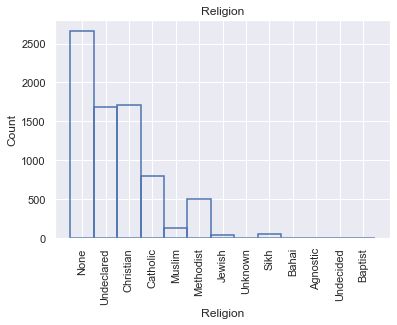

In [654]:
g = sns.histplot(data=census, x="Religion", bins = 30, binwidth=10, fill=False)

g.tick_params(axis='x', rotation=90)

g.set_title('Religion');

Notes: <br> 
* Jedi is not a valid religion according to charity commision for England and Wales
* An individual stated her religion as private. This was replaced with unknown as there is no religion refered to as private and <br> 
* The purpose of this part of the census is to learn the religion of every individual. 

#### Age
* I chose the bins and binwidth by looking at the distribution of their ages

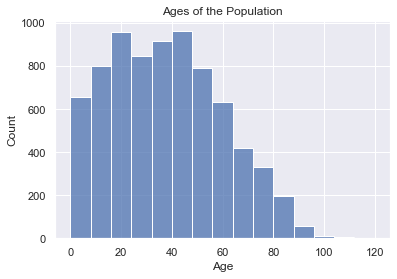

In [655]:
ag = sns.histplot(data=census, x="Age", bins = 15, binwidth=8)

ag.set_title('Ages of the Population');

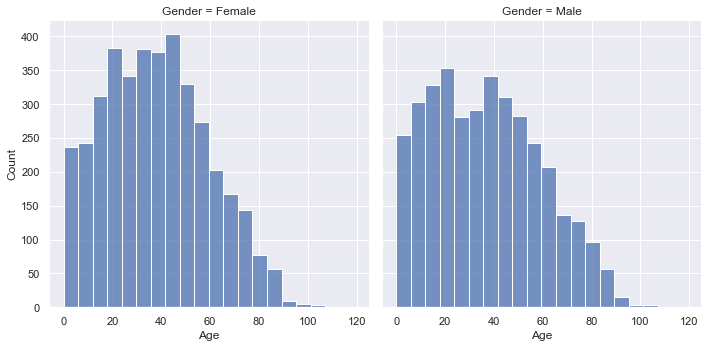

In [656]:
a_g = sns.displot(data=census, x="Age", col="Gender", bins =20)

## Age Pyramid

In [657]:
age_pyramid = pd.DataFrame({'Age': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'], 
                    'M': [-202, -242, -265, -309, -266, -236, -246, -262, -285, -256, -223, -195, -177, -122, -116, -97, -78, -34, -15, -2, -6], 
                    'F': [192, 203, 237, 292, 315, 277, 326, 309, 345, 300, 264, 222, 172, 142, 136, 82, 71, 44, 8, 6, 4]})

In [658]:
age_pyramid.to_excel('age_pyramid.xlsx', index=False)

In [659]:
age_pyramid = pd.read_excel('age_pyramid.xlsx')

In [660]:
age_pyramid.head()

,Age,M,F
0,0-4,-202,192
1,5-9,-242,203
2,10-14,-265,237
3,15-19,-309,292
4,20-24,-266,315


Generating Age range data 

* This code was used to generate the count of male  and female within age intervals as specified below in the pyramid
and a spreadsheet was populated with this data.

In [661]:
Fe_male = census[(census['Age'] <= 4) & (census['Gender']=='Female')]
len(Fe_male)

192

[Text(0.5, 0, 'Population Count'),
 Text(0, 0.5, 'Age Group'),
 Text(0.5, 1.0, 'Population Pyramid of United Kingdom-1881')]

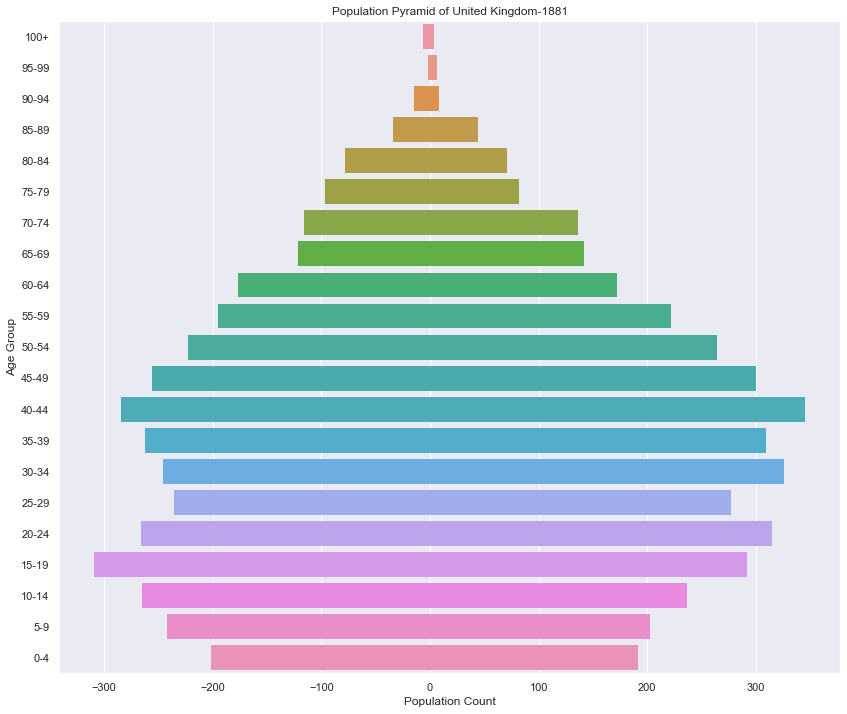

In [662]:
AgeClass = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']


fig_dims = (14, 12)
fig, ax = plt.subplots(figsize=fig_dims)
bar_plot = sns.barplot(x='M', y='Age', data=age_pyramid, order=AgeClass, ax=ax, lw=0)
bar_plot = sns.barplot(x='F', y='Age', data=age_pyramid, order=AgeClass, ax=ax, lw=0)
bar_plot.set(xlabel="Population Count", ylabel="Age Group", title = "Population Pyramid of United Kingdom-1881")

### Age Conditioned with Religion Plot

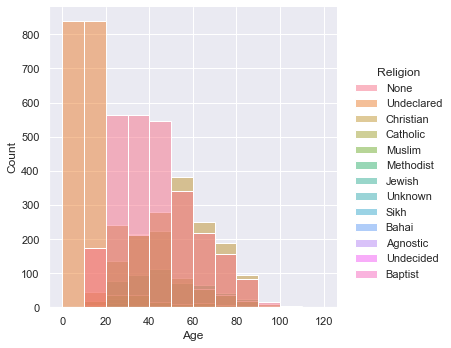

In [664]:
sns.displot(data=census, x="Age", bins = 30, binwidth = 10, hue="Religion")

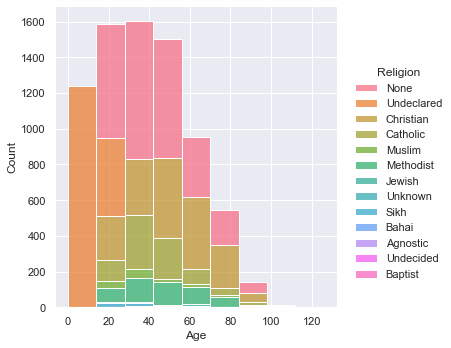

In [665]:
sns.displot(data=census, x="Age", hue="Religion", binwidth = 14, multiple="stack")

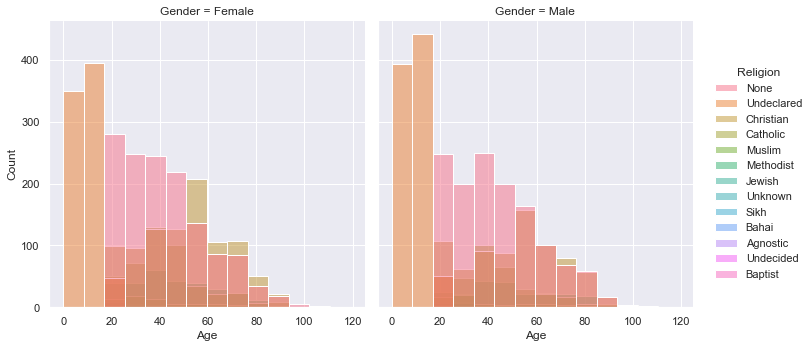

In [666]:
sns.displot(data=census, x="Age", bins=14, hue="Religion", col="Gender")

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='Marital Status', ylabel='Age'>

Text(0, 0.5, 'Age')

Text(0.5, 0, 'Marital Status')

Text(0.5, 1.0, 'Age distribution of Marital Status')

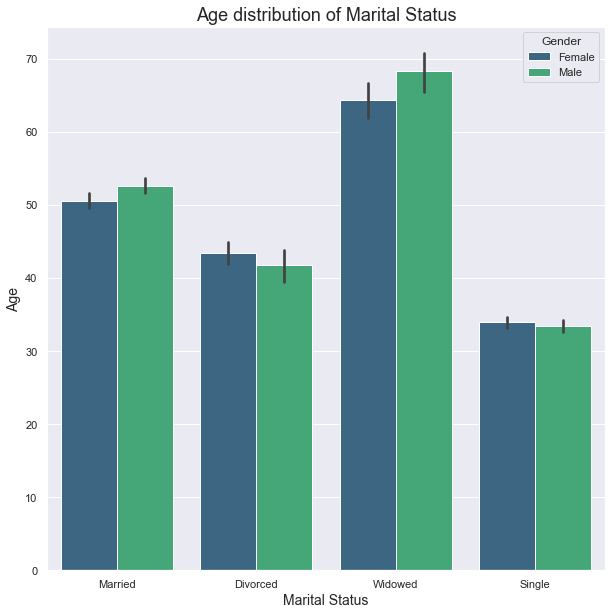

In [667]:
plt.figure(figsize=(10, 10))
sns.barplot(x="Marital Status", 
            y="Age", 
            hue="Gender", 
            data=census, palette="viridis")
plt.ylabel("Age", size=14)
plt.xlabel("Marital Status", size=14)
plt.title("Age distribution of Marital Status", size=18)
plt.savefig("grouped_barplot_Age_distribution_of_Marital_Status.png")

<AxesSubplot:xlabel='Marital Status', ylabel='Age'>

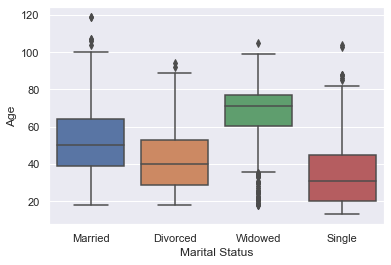

In [668]:
sns.boxplot(x="Marital Status", y="Age", data=census)

In [669]:
px.strip(census, x= 'Occupation', y='Age',color="Gender", hover_name = "Occupation")

<b> Life expectancy

In [670]:
px.bar(census, x= 'Occupation', y='Infirmity',color="Age", hover_name = "Occupation", height=600)

### 3-D Plot - How Occupation, Marital Status, and Age impacts life expectancy
* This chart inspects how employment status, Marital Status and Age contributes to life expectancy.

In [671]:
px.scatter_3d(census, x='Age', y='Occupation', z = 'Marital Status', color="Gender", hover_name ='Infirmity' , height=600)

### Summary
Census data have been cleaned using various python programming and its various libraries. Analysis such as as the number of commuters, divorce rate, unemployment rate, religious affliations, population change etc. with extensive diagramatical  representation of the data using charts, tables were outlined. Forecast were also made from the analysis to make recommendations and improve town planning.

## Reference

Children with ages under 18 Children between 12-17 have poor decision making - (Corado, 2014) [Decision Making of Children](https://boap.uib.no/index.php/BJCLCJ/article/view/707)

change word to number module in python (Python, 2021) [Python Documentation](https://pypi.org/project/word2number/)

Replacing NaN elements [Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

Divorce rate - https://marriagefoundation.org.uk/wp-content/uploads/2019/09/MF-What-is-the-divorce-rate-FINAL.pdf

interquartile range [interquartile Range](https://www.statology.org/interquartile-range-python/)

Calculating Immigration and Emigration rates - (Palumbo, 2014) - [Migration Rates](https://prezi.com/f01gquip7ama/calculating-immigration-and-emigration-rates/)

How to spot lies in census data [Lies in census data](https://www.smh.com.au/national/trolling-the-census-how-the-abs-knows-if-youre-lying-20160808-gqnhig.html)

Religion and Children with ages under 18-(NSPCC, 2021) 
[Children and Law](https://learning.nspcc.org.uk/child-protection-system/children-the-law#:~:text=The%20United%20Nations%20Convention%20on,%2C%20majority%20is%20attained%20earlier%22)

Unemployment rate -(ONS, 2022) [Unemployment Rate](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/methodologies/aguidetolabourmarketstatistics)

Travel to work commuters - (ONS, 2011) - [Travel to work Analysis](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/articles/traveltoworkareaanalysisingreatbritain/2016)